# 09 - Calculate biodiversity indices

The goal of this notebook is to calculate several biodiversity indices for each point.

The following will be calculated:

- Shannon-wienner
- richness
- abundance
- Simpson
- alpha diversity
- beta diversity

The index values will be added to the occurrence table.

#### Inputs

- table of bird occurrences corrected, as createt in step 08: `occ_consumption_cor.csv`

#### Outputs

- table with new columns containing shannon and richness values: `biodiversity_data.csv`



In [1]:
# import modules
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
%matplotlib inline

## Shannon-wienner, Species Richness and Species Abundance

The following functions will calculate the following indices:
- Shannon-Wienner (also called entropy index)
- species richness
- species abundance

In [2]:
# function to canculate indices. Generated with ChatGPT

def calculate_shannon_diversity(data):
    """
    Calculates Shannon diversity index from biodiversity survey data.

    Parameters:
        data (numpy.ndarray): A 2D array where rows represent samples and columns represent species.

    Returns:
        float: Shannon diversity index.
    """
    proportions = data / np.sum(data, axis=1, keepdims=True)
    return np.sum(-proportions * np.log(proportions + np.finfo(float).eps), axis=1)


def calculate_species_richness(data):
    """
    Calculates species richness from biodiversity survey data.

    Parameters:
        data (numpy.ndarray): A 2D array where rows represent samples and columns represent species.

    Returns:
        numpy.ndarray: Array containing species richness for each sample.
    """
    nonzero_counts = np.count_nonzero(data, axis=1)
    return nonzero_counts


def calculate_species_abundance(data):
    """
    Calculates species abundance from biodiversity survey data.

    Parameters:
        data (numpy.ndarray): A 2D array where rows represent samples and columns represent species.

    Returns:
        numpy.ndarray: Array containing species abundance for each species.
    """
    total_counts = np.sum(data, axis=0)
    return total_counts

Open bird data at occurrence level. This table is corrected for the effect of species of large groups.

In [3]:
# import data
bird_data = pd.read_csv('../process_data/occ_consumption_cor.csv', low_memory = False)


In [4]:
# create table of biodiversity data as a 2D numpy array where rows represent samples and columns represent species.

bird_data1 = pd.pivot_table(bird_data, values = 'OBSERVATION COUNT', index = ['SAMPLING EVENT IDENTIFIER'], 
                                   columns = ['SCIENTIFIC NAME_x'])



In [5]:
bird_data1.fillna(0,inplace=True)

In [6]:
bird_data1.shape

(18783, 63)

In [7]:
biodiversity_data = bird_data1.values

In [8]:
biodiversity_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
shannon_diversity = calculate_shannon_diversity(biodiversity_data)
species_richness = calculate_species_richness(biodiversity_data)
species_abundance = calculate_species_abundance(biodiversity_data)

print("Shannon Diversity:", shannon_diversity)
print("Species Richness:", species_richness)
print("Species Abundance:", species_abundance)

Shannon Diversity: [ 1.20479331e+00  1.08889998e+00 -2.22044605e-16 ...  9.50270539e-01
  1.07899221e+00 -2.22044605e-16]
Species Richness: [4 4 1 ... 3 3 1]
Species Abundance: [1.99200e+03 1.47314e+05 1.29000e+02 1.26810e+04 6.08100e+03 2.10000e+03
 1.43500e+03 4.45300e+03 2.70000e+02 1.02400e+03 6.26000e+02 9.70000e+01
 4.45000e+02 2.78000e+02 1.00230e+04 6.08800e+03 4.29000e+02 1.20000e+01
 3.15100e+03 4.94000e+02 4.00000e+01 1.76900e+03 1.99390e+04 8.38000e+02
 2.11000e+02 1.06000e+02 1.68000e+02 6.31500e+03 3.36200e+03 1.60400e+03
 5.30000e+02 1.04450e+03 5.17000e+02 2.22000e+02 4.85700e+03 8.13000e+03
 6.49600e+03 2.89700e+03 7.55650e+04 6.20000e+01 2.92000e+03 4.30700e+03
 4.06800e+03 1.00000e+00 9.91000e+02 1.80000e+01 5.90000e+01 9.77050e+03
 2.24500e+03 9.97000e+02 6.04300e+03 9.90000e+01 1.00200e+03 2.74600e+03
 1.87000e+02 2.63000e+03 6.38200e+03 1.18550e+04 1.69200e+03 2.73900e+03
 3.08700e+03 6.78000e+03 5.13000e+02]


In [10]:
shannon_diversity.shape

(18783,)

In [11]:
bird_data1['shannon'] = shannon_diversity.tolist()

In [12]:
bird_data1['richness'] = species_richness.tolist()

In [13]:
bird_data1.to_csv('../process_data/biodiversity_data.csv')

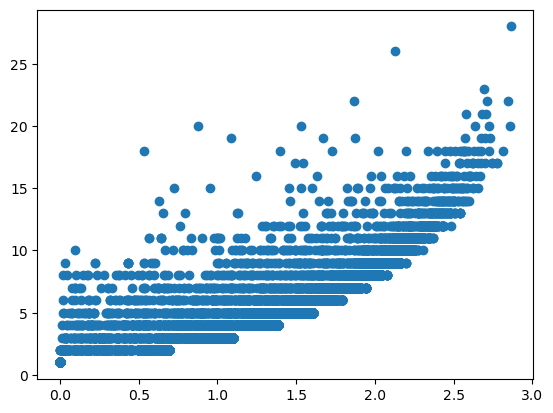

In [14]:
plt.scatter(bird_data1['shannon'], bird_data1['richness'])

## Alpha-diversity, Beta-diversity

The following calculates alpha and beta-diversity. However, these values are not further explored in the workflow.

In [15]:
from scipy.spatial.distance import pdist, squareform


def calculate_alpha_diversity(data):
    """
    Calculates alpha diversity from biodiversity survey data.

    Parameters:
        data (numpy.ndarray): A 2D array where rows represent samples and columns represent species.

    Returns:
        float: Alpha diversity value.
    """
    num_species = data.shape[1]
    species_counts = np.sum(data, axis=1)
    proportions = species_counts / num_species
    return np.exp(np.mean(np.log(proportions)))


def calculate_beta_diversity(data):
    """
    Calculates beta diversity from biodiversity survey data.

    Parameters:
        data (numpy.ndarray): A 2D array where rows represent samples and columns represent species.

    Returns:
        float: Beta diversity value.
    """
    pairwise_distances = pdist(data, metric='euclidean')
    return np.mean(pairwise_distances)


In [16]:
# Example usage:
# Assuming your data is stored in a 2D numpy array called 'biodiversity_data'
alpha_diversity = calculate_alpha_diversity(biodiversity_data)
beta_diversity = calculate_beta_diversity(biodiversity_data)

print("Alpha Diversity:", alpha_diversity)
print("Beta Diversity:", beta_diversity)


Alpha Diversity: 0.11395198666054021
Beta Diversity: 30.119736084575518


In [17]:
np.sum(biodiversity_data, axis=1)

array([13., 10., 20., ..., 10.,  7.,  2.])